 NAME :AMEENA SADIQUE

 STUDENT ID : SAD22603583

In [43]:
# Install necessary package
!pip install keras-tuner

In [105]:
from kerastuner import RandomSearch
from google.colab import files
import pandas as pd
import warnings

# Upload the files to the Colab environment
uploaded = files.upload()

# Read the Excel files into pandas DataFrames
gene_data = pd.read_excel('Final_Extended_Combined_Gene_CDS.xlsx')
phenotype_data = pd.read_excel('Combined_Phenotypes_Final.xlsx')

# Display the first few rows of each dataframe
print("Gene Data:")
print(gene_data.head())
print("\nPhenotype Data:")
print(phenotype_data.head())

Saving Final_Extended_Combined_Gene_CDS.xlsx to Final_Extended_Combined_Gene_CDS (1).xlsx
Saving Combined_Phenotypes_Final.xlsx to Combined_Phenotypes_Final (1).xlsx
Gene Data:
      Gene                              Phenotype Activity Score  \
0    ABCG2                     Decreased Function            NaN   
1    ABCG2                        Normal Function            NaN   
2    ABCG2                          Poor Function            NaN   
3  CACNA1S  Malignant Hyperthermia Susceptibility            NaN   
4  CACNA1S               Uncertain Susceptibility            NaN   

  EHR Priority Result Notation  \
0  Abnormal/Priority/High Risk   
1      Normal/Routine/Low Risk   
2  Abnormal/Priority/High Risk   
3  Abnormal/Priority/High Risk   
4                  Normal Risk   

                                   Consultation Text  
0  This result signifies that the patient has one...  
1  This result signifies that the patient has two...  
2  This result signifies that the patient ha

In [106]:
# Filling NaNs with the median value for numeric columns
phenotypes_df_filled = phenotype_data.fillna(phenotype_data.median(numeric_only=True))
genes_df_filled = gene_data.fillna(gene_data.median(numeric_only=True))

# Filling remaining NaNs with 'Unknown'
phenotypes_df_filled = phenotypes_df_filled.fillna('Unknown')
genes_df_filled = genes_df_filled.fillna('Unknown')

# Verify that all NaNs have been filled
phenotypes_nan_check = phenotypes_df_filled.isna().sum()
genes_nan_check = genes_df_filled.isna().sum()

print(phenotypes_nan_check)
print(genes_nan_check)


Allele 1 Function          0
Allele 2 Function          0
Activity Value Allele 1    0
Activity Value Allele 2    0
Activity Score             0
Phenotype                  0
Description                0
Gene                       0
dtype: int64
Gene                            0
Phenotype                       0
Activity Score                  0
EHR Priority Result Notation    0
Consultation Text               0
dtype: int64


In [110]:
from google.colab import drive
drive.mount('/content/drive')

# Combine the datasets on the 'Gene' column
combined_data = pd.merge(genes_df_filled , phenotypes_df_filled, on='Gene')

# Display the first few rows of the combined dataframe
print("Combined Data:")
print(combined_data.head())

# Print column names to check for correct target column
print("Columns in combined data:")
print(combined_data.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Combined Data:
    Gene         Phenotype_x Activity Score_x EHR Priority Result Notation  \
0  ABCG2  Decreased Function          Unknown  Abnormal/Priority/High Risk   
1  ABCG2  Decreased Function          Unknown  Abnormal/Priority/High Risk   
2  ABCG2  Decreased Function          Unknown  Abnormal/Priority/High Risk   
3  ABCG2     Normal Function          Unknown      Normal/Routine/Low Risk   
4  ABCG2     Normal Function          Unknown      Normal/Routine/Low Risk   

                                   Consultation Text   Allele 1 Function  \
0  This result signifies that the patient has one...  Decreased function   
1  This result signifies that the patient has one...     Normal function   
2  This result signifies that the patient has one...     Normal function   
3  This result signifies that the patient has two...  Decreased function   
4  This

In [111]:
# Use the correct column name for the target variable
target_column = 'Phenotype_x'

# Include 'Phenotype_y' as a feature
X = combined_data.drop(columns=[target_column])  # Keep 'Phenotype_y' in features
y = combined_data[target_column]

In [112]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders for all object type columns
label_encoders = {}

for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(target_encoder.classes_), activation='softmax')  # For multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/50
33/33 [==============================] - 2s 14ms/step - loss: 2.7738 - accuracy: 0.2997 - val_loss: 2.1626 - val_accuracy: 0.5670
Epoch 2/50
33/33 [==============================] - 0s 8ms/step - loss: 1.7624 - accuracy: 0.5408 - val_loss: 1.3328 - val_accuracy: 0.6782
Epoch 3/50
33/33 [==============================] - 0s 6ms/step - loss: 1.2234 - accuracy: 0.6801 - val_loss: 1.0220 - val_accuracy: 0.7165
Epoch 4/50
33/33 [==============================] - 0s 7ms/step - loss: 1.0078 - accuracy: 0.7070 - val_loss: 0.8884 - val_accuracy: 0.7318
Epoch 5/50
33/33 [==============================] - 0s 6ms/step - loss: 0.8926 - accuracy: 0.7205 - val_loss: 0.8086 - val_accuracy: 0.7356
Epoch 6/50
33/33 [==============================] - 0s 7ms/step - loss: 0.8134 - accuracy: 0.7406 - val_loss: 0.7509 - val_accuracy: 0.7203
Epoch 7/50
33/33 [==============================] - 0s 8ms/step - loss: 0.7567 - accuracy: 0.7474 - val_loss: 0.7092 - val_accuracy: 0.7203
Epoch 8/50
33/33 [=

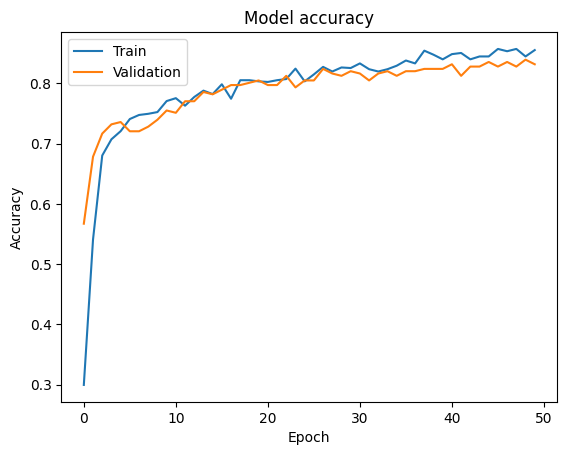

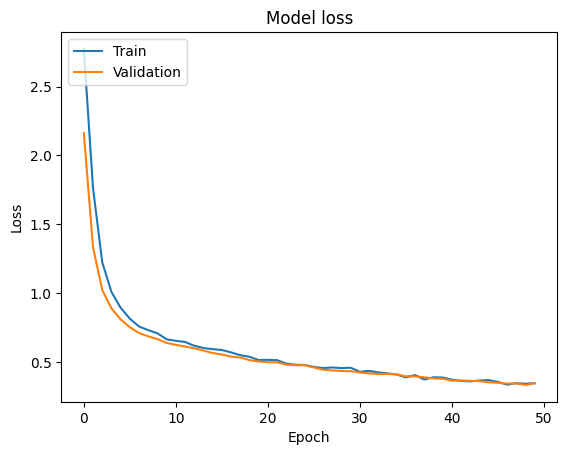

In [115]:
#Visualization
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [118]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get unique classes from true labels and predicted labels
unique_true_classes = np.unique(y_test)
unique_pred_classes = np.unique(y_pred_classes)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes, labels=unique_true_classes)
print("Confusion Matrix:")
print(conf_matrix)



11/11 [==============================] - 0s 7ms/step
Confusion Matrix:
[[ 0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 58  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2 55  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  1  3 25  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 

11/11 [==============================] - 0s 2ms/step


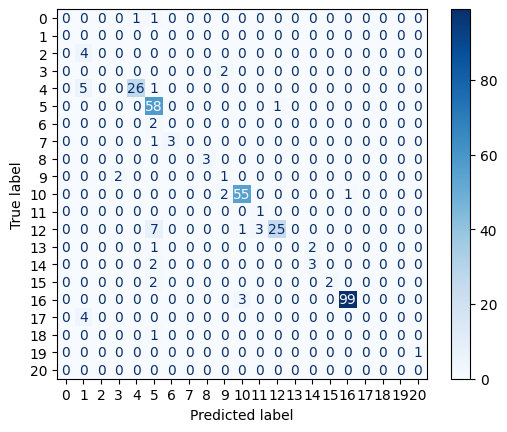

In [117]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Optionally, visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)  # You can choose a color map you prefer
plt.show()



In [119]:
# Convert unique class indices to actual class names using target encoder
actual_target_names = target_encoder.inverse_transform(unique_true_classes)

# Ensure all target names are strings
actual_target_names = [str(name) for name in actual_target_names]

# Generate the classification report using the correct labels and target names
class_report = classification_report(y_test, y_pred_classes, labels=unique_true_classes, target_names=actual_target_names)
print("\nClassification Report:")
print(class_report)


Classification Report:
                                                       precision    recall  f1-score   support

                                   Decreased Function       0.00      0.00      0.00         2
                                 Deficient with CNSHA       0.00      0.00      0.00         4
                                   Increased Function       0.00      0.00      0.00         2
                                        Indeterminate       0.96      0.81      0.88        32
                             Intermediate Metabolizer       0.76      0.98      0.86        59
                      Likely Intermediate Metabolizer       0.00      0.00      0.00         2
                              Likely Poor Metabolizer       0.00      0.00      0.00         4
                                               Normal       1.00      1.00      1.00         3
                                      Normal Function       0.20      0.33      0.25         3
                         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
# Define a function to build the model with different hyperparameters
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(len(target_encoder.classes_), activation='softmax'))
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform hyperparameter search
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=10,
                     executions_per_trial=2,
                     directory='my_dir',
                     project_name='hyperparam_tuning')
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print best hyperparameters
print(f"The best number of units is {best_hps.get('units')}")
print(f"The best dropout rate is {best_hps.get('dropout')}")
print(f"The best optimizer is {best_hps.get('optimizer')}")



Reloading Tuner from my_dir/hyperparam_tuning/tuner0.json
The best number of units is 480
The best dropout rate is 0.0
The best optimizer is rmsprop


In [122]:
#Cross-validation
from tensorflow.keras.layers import Input

def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Use Input layer for defining input shape
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(len(target_encoder.classes_), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [123]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score

class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, epochs=1, batch_size=32, verbose=0, **kwargs):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.kwargs = kwargs
        self.model_ = None

    def fit(self, X, y, **kwargs):
        self.model_ = self.build_fn()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose, **kwargs)
        return self

    def predict(self, X, **kwargs):
        return np.argmax(self.model_.predict(X), axis=-1)

    def score(self, X, y, **kwargs):
        return self.model_.evaluate(X, y, verbose=self.verbose, **kwargs)[1]

# Re-instantiate and use the custom classifier
model = CustomKerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Run cross-validation
scores = cross_val_score(model, X_scaled, y, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean()} ± {scores.std()}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy: 0.7622388005256653 ± 0.13590961994661022


In [125]:
# Define the model with the best hyperparameters
best_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(units=best_hps.get('units'), activation='relu'),
    Dropout(best_hps.get('dropout')),
    Dense(len(target_encoder.classes_), activation='softmax')
])

# Compile the model
best_model.compile(optimizer=best_hps.get('optimizer'),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
best_model.fit(X_scaled, y, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Save the model in the new format
best_model.save("final_model.keras")



Epoch 1/50
41/41 [==============================] - 1s 12ms/step - loss: 1.5888 - accuracy: 0.7343 - val_loss: 3.0579 - val_accuracy: 0.1994
Epoch 2/50
41/41 [==============================] - 0s 6ms/step - loss: 0.6590 - accuracy: 0.8395 - val_loss: 3.3076 - val_accuracy: 0.1626
Epoch 3/50
41/41 [==============================] - 0s 6ms/step - loss: 0.4474 - accuracy: 0.8449 - val_loss: 3.6340 - val_accuracy: 0.1933
Epoch 4/50
41/41 [==============================] - 0s 6ms/step - loss: 0.3641 - accuracy: 0.8702 - val_loss: 3.9867 - val_accuracy: 0.1626
Epoch 5/50
41/41 [==============================] - 0s 6ms/step - loss: 0.3166 - accuracy: 0.8940 - val_loss: 4.3097 - val_accuracy: 0.1963
Epoch 6/50
41/41 [==============================] - 0s 7ms/step - loss: 0.2811 - accuracy: 0.9055 - val_loss: 4.7391 - val_accuracy: 0.2117
Epoch 7/50
41/41 [==============================] - 0s 4ms/step - loss: 0.2581 - accuracy: 0.9178 - val_loss: 5.1135 - val_accuracy: 0.2117
Epoch 8/50
41/41 [=

In [126]:
# Print unique gene names
print("Available Genes:")
print(combined_data['Gene'].unique())

# Print unique phenotypes
print("\nAvailable Phenotypes:")
print(combined_data['Phenotype_y'].unique())

Available Genes:
['ABCG2' 'CACNA1S' 'CYP2B6' 'CYP2C9' 'CYP2C19' 'CYP2D6' 'CYP3A5' 'DPYD'
 'G6PD' 'MT-RNR1' 'NUDT15' 'SLCO1B1' 'TPMT']

Available Phenotypes:
['ABCG2 Poor Function' 'ABCG2 Normal Function' 'ABCG2 Decreased Function'
 'CACNA1S Uncertain Susceptibility'
 'CACNA1S Malignant Hyperthermia Susceptibility'
 'CYP2B6 Ultrarapid Metabolizer' 'CYP2B6 Rapid Metabolizer'
 'CYP2B6 Poor Metabolizer' 'CYP2B6 Normal Metabolizer'
 'CYP2B6 Intermediate Metabolizer' 'CYP2B6 Indeterminate'
 'CYP2C9 Normal Metabolizer' 'CYP2C9 Intermediate Metabolizer'
 'CYP2C9 Poor Metabolizer' 'CYP2C9 Indeterminate'
 'CYP2C19 Ultrarapid Metabolizer' 'CYP2C19 Rapid Metabolizer'
 'CYP2C19 Poor Metabolizer' 'CYP2C19 Normal Metabolizer'
 'CYP2C19 Likely Poor Metabolizer'
 'CYP2C19 Likely Intermediate Metabolizer'
 'CYP2C19 Intermediate Metabolizer' 'CYP2C19 Indeterminate'
 'CYP2D6 Ultrarapid Metabolizer' 'CYP2D6 Normal Metabolizer'
 'CYP2D6 Intermediate Metabolizer' 'CYP2D6 Poor Metabolizer'
 'CYP2D6 Indetermin

In [127]:
#Prediction
def predict_with_gene_phenotype(gene, phenotype, combined_data, model, scaler, label_encoders, target_encoder):
    # Filter the row corresponding to the input gene and phenotype
    gene_phenotype_row = combined_data[(combined_data['Gene'] == gene) & (combined_data['Phenotype_y'] == phenotype)]

    if gene_phenotype_row.empty:
        raise ValueError("Gene and Phenotype combination not found in the dataset.")

    # Drop the target column
    gene_features = gene_phenotype_row.drop(columns=['Phenotype_x'])

    # Encode categorical features
    for column in gene_features.select_dtypes(include=['object']).columns:
        if column in label_encoders:
            le = label_encoders[column]
            gene_features[column] = le.transform(gene_features[column])

    # Scale the features
    gene_features_scaled = scaler.transform(gene_features)

    # Make predictions
    predictions = model.predict(gene_features_scaled)
    predicted_class = np.argmax(predictions, axis=1)

    # Decode the predicted class
    predicted_phenotype = target_encoder.inverse_transform(predicted_class)

    # Create a dictionary for the output
    # Create a dictionary for the output with additional information
    output = {
        'Gene': gene,
        'Phenotype': phenotype,
        'Predicted Phenotype_x': predicted_phenotype[0],
        'Activity Score_x': gene_phenotype_row['Activity Score_x'].values[0],
        'EHR Priority Result Notation': gene_phenotype_row['EHR Priority Result Notation'].values[0],
        'Consultation Text': gene_phenotype_row['Consultation Text'].values[0],
        'Allele 1 Function': gene_phenotype_row['Allele 1 Function'].values[0],
        'Allele 2 Function': gene_phenotype_row['Allele 2 Function'].values[0],
        'Activity Value Allele 1': gene_phenotype_row['Activity Value Allele 1'].values[0],
        'Activity Value Allele 2': gene_phenotype_row['Activity Value Allele 2'].values[0],
        'Description': gene_phenotype_row['Description'].values[0]
    }
    # Print output line by line
    print("Prediction Results:")
    for key, value in output.items():
        print(f"{key}: {value}")
    return output

# input specific gene and phenotype that we want to predict
gene = 'TPMT'
phenotype = 'TPMT Indeterminate'
output = predict_with_gene_phenotype(gene, phenotype, combined_data, best_model, scaler, label_encoders, target_encoder)

1/1 [==============================] - 0s 103ms/step
Prediction Results:
Gene: TPMT
Phenotype: TPMT Indeterminate
Predicted Phenotype_x: Intermediate Metabolizer
Activity Score_x: Unknown
EHR Priority Result Notation: Abnormal/Priority/High Risk
Consultation Text: This result signifies that the patient has an allele combination with uncertain and/or unknown function alleles. The expected phenotype for this patient cannot be determined currently based on the TPMT diplotype result. Consider evaluating TPMT erythrocyte activity to assess TPMT phenotype. Erythrocyte TPMT activity test results can be falsely low at diagnosis of leukemia and is unreliable in the case of recent red blood cell transfusions. If thiopurines are required and TPMT status is unknown, monitor closely for toxicity. Please consult a clinical pharmacist for more specific information about how TPMT function influences drug dosing.
Allele 1 Function: Unknown function
Allele 2 Function: Normal function
Activity Value Alle